In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

## Understand the data

In [2]:
#Import the data set
df=pd.read_csv("UCI_breastcancer_data.csv")

In [3]:
#Display the first five rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
# Check the number of benign and malignant cases
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# Check if there are any missing values in the data set
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Visualize the Data

In [8]:
range(len(df))

range(0, 569)

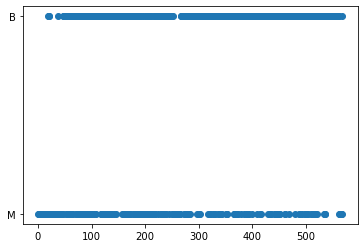

In [9]:
#Plot the different diagnosi: B= benign M= Malignant
plt.scatter(x=range(len(df)), y=df["diagnosis"])

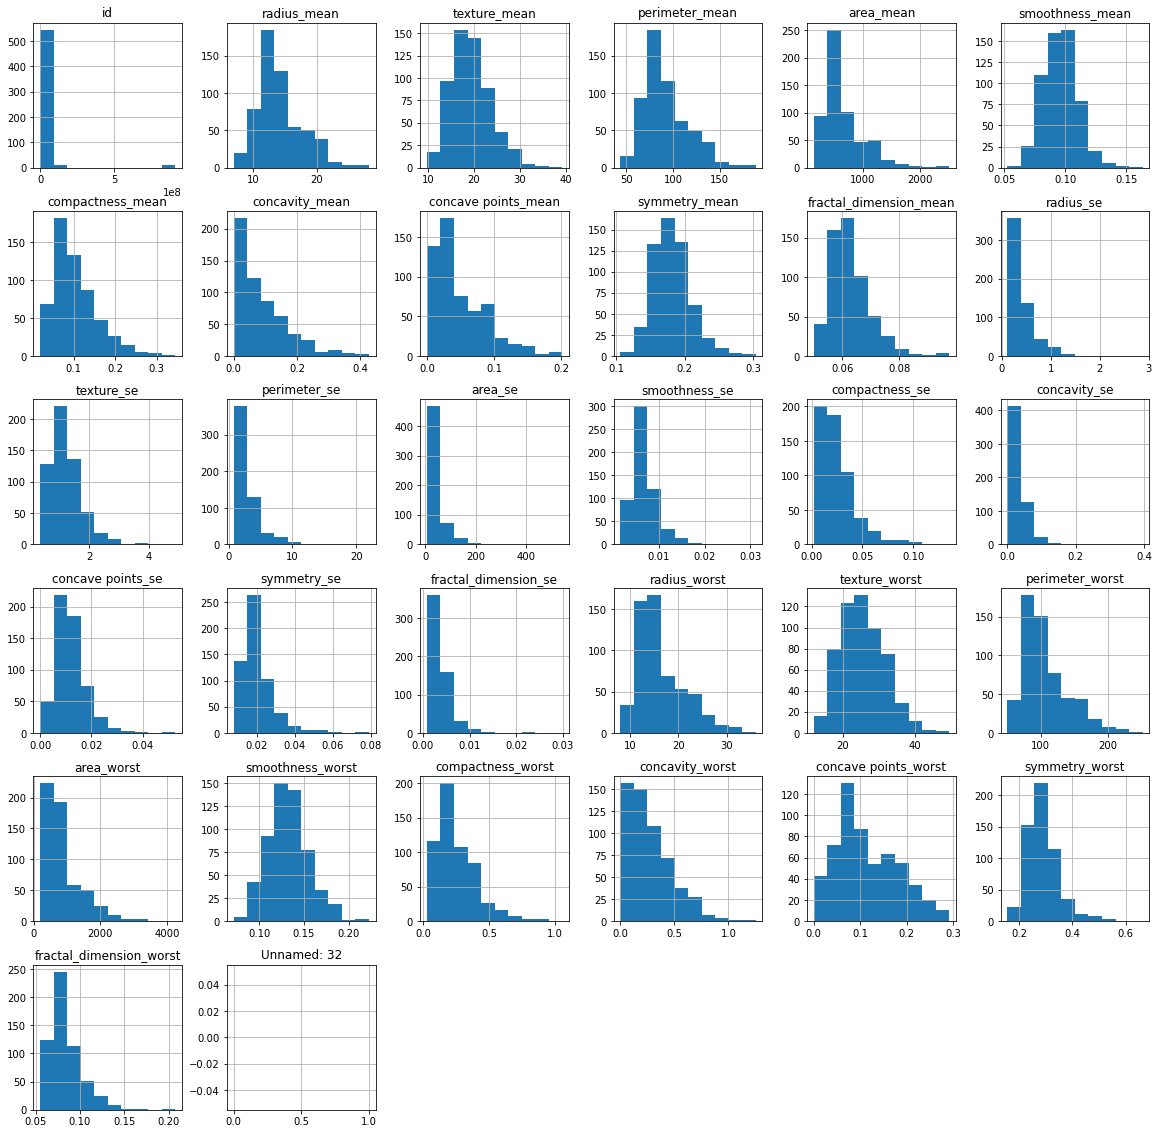

In [10]:
# plot each column to vizulaize the frequency of it
num_bins=10 
df.hist(figsize=(20,20))
plt.show()

##### Data needs to be standarized because there are some features that have values between 0-0.3 and there are some features with numerical values >200

## Define X and Y variables 

In [11]:
### Set Y and X variable 

# Assign Indpendent variable to x
x=df.iloc[:, 2:31]

#Assigne dependent target variable to y 
y= df.iloc[:,1]

## Label Encoder
Algorithms can read numerical data better than categorical data. Our target varibale "diagnosis" is categorical. Hence convert it into a numeric binary varibale as shown below.

In [12]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Split data into train and test

In [14]:
#split the data set 
from sklearn.model_selection  import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=(0.25))

In [15]:

print(len(x_train))
len(y_train)


426


426

In [16]:
print(len(x_test))
len(y_test)


143


143

## Standardize the different features 

In [17]:
### Tranform the data to nomralize the scaling magnitude: 

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train).shape## re-sizes all the columns 
sc.transform (x_test) ## don't fit the data here. using the same parameters from fit_transform to transform this data.somehow the fit parameters carry over.

array([[ 0.95659632,  1.25029542,  1.00218027, ...,  1.03729862,
         0.89171521, -1.19489338],
       [-0.73388374, -1.13658296, -0.71074684, ..., -0.43986266,
        -0.68976478, -0.92568199],
       [-0.31767786,  1.35518754, -0.38179871, ..., -1.0849805 ,
        -0.84296489, -0.96232022],
       ...,
       [-1.20824442,  0.01956126, -1.15292585, ..., -0.03535067,
        -0.25475022, -0.45894271],
       [-0.38894599, -0.60979144, -0.38593123, ..., -0.61847835,
        -0.51658872,  0.25629938],
       [-0.67686924, -1.23448227, -0.72769015, ..., -0.9764261 ,
        -0.47894176,  0.30408839]])

## Model Selection 

### 1. Logistic Regression

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sn
from sklearn.metrics import confusion_matrix

#### Build the Model

In [19]:
## use logisitic regresssion to train the x_train data_set 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,max_iter=3000)
model.fit(x_train, y_train)
predicted_y= model.predict(x_test)


#### Accuracy Score

In [20]:
accuracy_score(y_test,predicted_y)

0.9790209790209791

<AxesSubplot:>

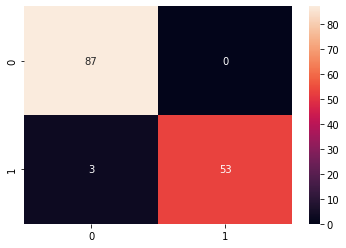

In [21]:
cm = confusion_matrix(y_test, predicted_y)

sns.heatmap(cm, annot=True)

#Model got it wrong 6 times 

In [22]:
model.coef_

array([[-0.93482637, -0.18362323,  0.29783364, -0.02198866,  0.15856997,
         0.21042477,  0.49677211,  0.27591258,  0.29369951,  0.02119291,
         0.10833626, -1.24818583,  0.33113519,  0.07400243,  0.01656991,
        -0.07755727,  0.00372195,  0.03163513,  0.04953298, -0.01753712,
        -0.07785416,  0.42441693,  0.04322537,  0.01450298,  0.31400368,
         0.65009828,  1.31761653,  0.53366267,  0.84732899]])

### 2. KNeighbors Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.9440559440559441

<AxesSubplot:>

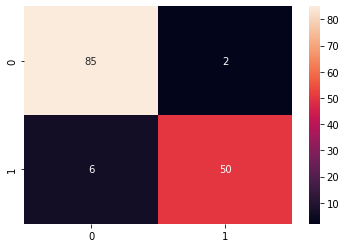

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
#Model classified it wrong 8 times

### 3. SVC method

In [26]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.972027972027972

<AxesSubplot:>

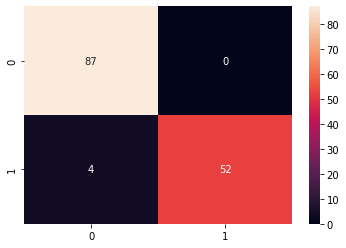

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
#Model classified it wrong 7 times

### 4. Kernal SVM algorithm

In [29]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(x_train, y_train)
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [30]:
accuracy_score(y_test,y_pred)

0.972027972027972

<AxesSubplot:>

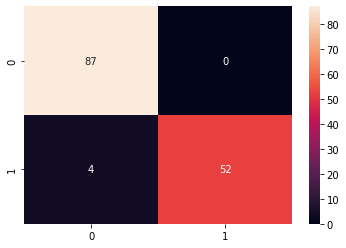

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
#Model classified it wrong 7 times

### 5. Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.965034965034965

<AxesSubplot:>

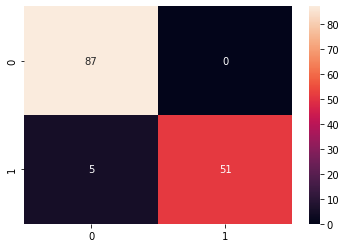

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
#Model classified it wrong 10 times

### 6.  Decision Tree classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.9440559440559441

<AxesSubplot:>

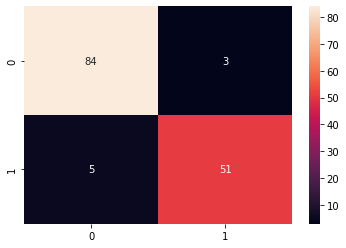

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
#Model classified it wrong 7 times

### 7. Random Forest Classifier 

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.9790209790209791

<AxesSubplot:>

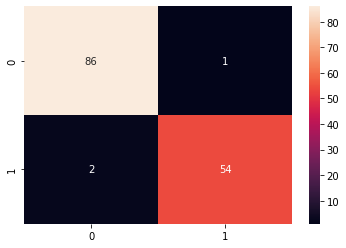

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
#Model classified it wrong 4 times

Random Forest classifier had the highest accuracy rate at 98%